In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


GRAPHS

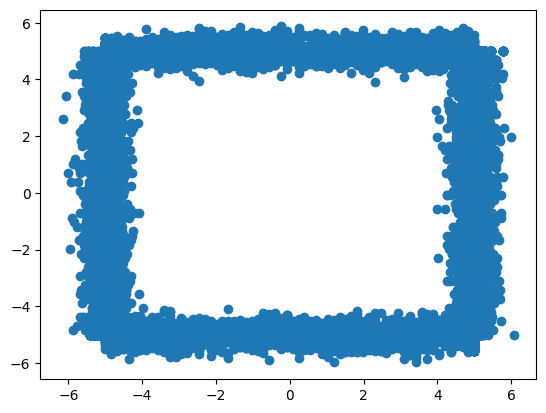

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("train/square_train.csv")
plt.scatter(df['Longitude'],df['Latitude'])

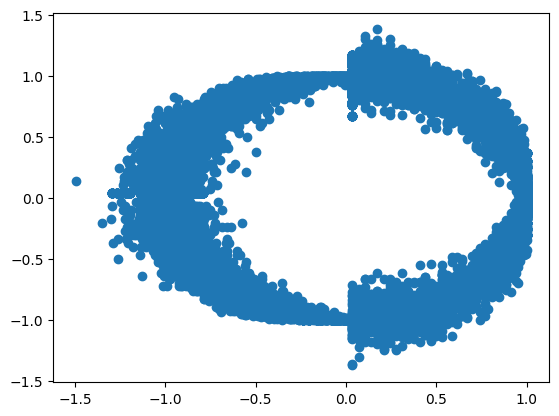

In [24]:
import matplotlib.pyplot as plt
df=pd.read_csv("train/circle_train.csv")
plt.scatter(df['Longitude'],df['Latitude'])

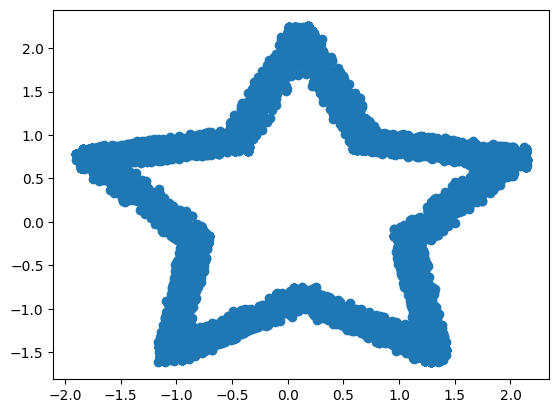

In [25]:
import matplotlib.pyplot as plt
df=pd.read_csv("train/star_train.csv")
plt.scatter(df['Longitude'],df['Latitude'])

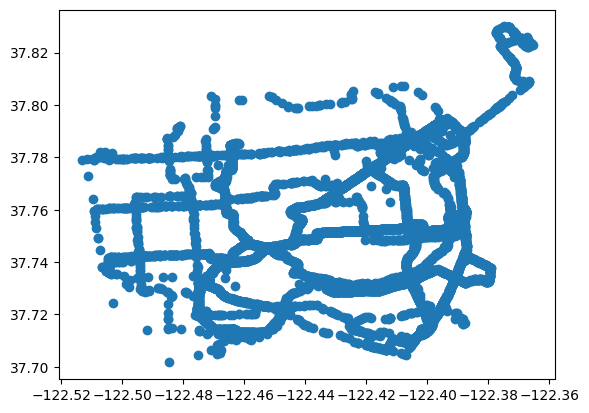

In [26]:
import matplotlib.pyplot as plt
df=pd.read_csv("train/real_train.csv")
plt.scatter(df['Longitude'],df['Latitude'])

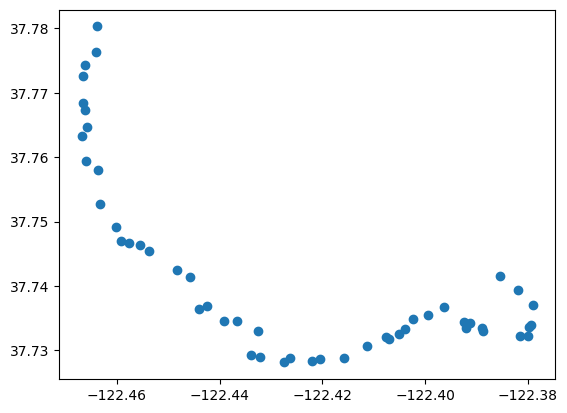

In [27]:
import matplotlib.pyplot as plt
df=pd.read_csv("test/real_1_test.csv")
plt.scatter(df['Longitude'],df['Latitude'])

MODEL ARCHITECTURE

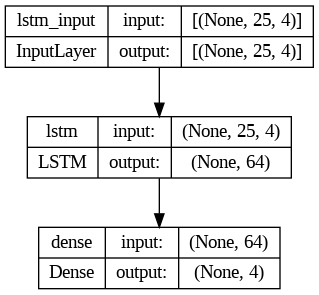

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(LSTM(64, input_shape=(25, 4)))
model.add(Dense(4))
model.compile(loss='mse', optimizer='Nadam')
plot_model(model, to_file='model_architecture.png', show_shapes=True)

MODEL TRAINING

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import warnings
import keras
from keras.preprocessing.sequence import TimeseriesGenerator

In [31]:
df_train = pd.concat(
    map(pd.read_csv, ['train/circle_train.csv', 'train/square_train.csv','train/star_train.csv','train/real_train.csv']), ignore_index=True)
df_train=df_train.drop("Position Date Time",axis=1)


In [32]:
df_train.to_csv("merged_train.csv")

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

dataset = df_train

# Extract the relevant columns
data = dataset[['Longitude', 'Latitude', 'Heading', 'Average Speed']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the input and output sequences
window_size = 25
X = []
y = []
for i in range(len(scaled_data) - window_size - 1):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size+1])

X = np.array(X)
y = np.array(y)

val_size=int(0.8*len(X))
X_train = X[:val_size]
y_train = y[:val_size]
x_val=X[val_size:]
y_val=y[val_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 4)))
model.add(Dense(4))
model.compile(loss='mse', optimizer='Nadam')

In [39]:

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1,validation_data=(x_val, y_val))

Epoch 1/10
1870/1870 [==============================] - 34s 16ms/step - loss: 0.0201 - val_loss: 0.0168
Epoch 2/10
1870/1870 [==============================] - 30s 16ms/step - loss: 0.0179 - val_loss: 0.0194
Epoch 3/10
1870/1870 [==============================] - 29s 15ms/step - loss: 0.0176 - val_loss: 0.0174
Epoch 4/10
1870/1870 [==============================] - 30s 16ms/step - loss: 0.0171 - val_loss: 0.0168
Epoch 5/10
1870/1870 [==============================] - 31s 16ms/step - loss: 0.0168 - val_loss: 0.0170
Epoch 6/10
1870/1870 [==============================] - 28s 15ms/step - loss: 0.0166 - val_loss: 0.0165
Epoch 7/10
1870/1870 [==============================] - 29s 15ms/step - loss: 0.0164 - val_loss: 0.0179
Epoch 8/10
1870/1870 [==============================] - 29s 15ms/step - loss: 0.0162 - val_loss: 0.0167
Epoch 9/10
1870/1870 [==============================] - 30s 16ms/step - loss: 0.0161 - val_loss: 0.0177
Epoch 10/10
1870/1870 [==============================] - 28s 15m

SAVING THE MODEL

In [40]:

model.save('model.h5')

TESTING THE MODEL ON TEST DATA

In [43]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [45]:
time_steps = 25
def create_sequences(data, time_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [46]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import warnings
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model


variables=['Longitude','Latitude','Heading','Average Speed']
df=pd.read_csv('/content/drive/MyDrive/soi/test/real_2_test.csv')
df = df[variables].astype(float)
# print(len(df))
n = 0
while n!=200:
  # print(len(df))
  df_for_training = df[variables].astype(float)
#   scaler = StandardScaler()
#   scaler = scaler.fit(df_for_training.tail(50))
#   df_for_training_scaled = scaler.transform(df_for_training.tail(50))

  scaler = MinMaxScaler(feature_range=(0, 1))
  df_for_training_scaled = scaler.fit_transform(df_for_training.tail(50))
  test_data_predict = df_for_training_scaled
  X_test, y_test = create_sequences(test_data_predict, time_steps)
  print(len(X_test))
  print(len(y_test))
  mse = model.evaluate(X_test, y_test)
  print('Mean Squared Error:', mse)

  # Make predictions
  predictions = model.predict(X_test)

  # Denormalize the predictions
  predictions = scaler.inverse_transform(predictions)
  df1 = pd.DataFrame(predictions, columns = ['Longitude','Latitude','Heading','Average Speed'])
  # print(df1)
  df = df.append(df1,ignore_index=True)
  # print(df)
  n = n + 25


25
25
1/1 [==============================] - 0s 446ms/step - loss: 0.0627
Mean Squared Error: 0.06271838396787643
1/1 [==============================] - 0s 435ms/step
25
25
1/1 [==============================] - 0s 30ms/step - loss: 0.0367
Mean Squared Error: 0.036665719002485275
1/1 [==============================] - 0s 23ms/step
25
25


<ipython-input-46-b53c458bd2b0>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1,ignore_index=True)
<ipython-input-46-b53c458bd2b0>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1,ignore_index=True)


1/1 [==============================] - 0s 36ms/step - loss: 0.0492
Mean Squared Error: 0.04922236129641533
1/1 [==============================] - 0s 27ms/step
25
25
1/1 [==============================] - 0s 29ms/step - loss: 0.0398
Mean Squared Error: 0.039842575788497925
1/1 [==============================] - 0s 26ms/step
25
25


<ipython-input-46-b53c458bd2b0>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1,ignore_index=True)
<ipython-input-46-b53c458bd2b0>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1,ignore_index=True)


1/1 [==============================] - 0s 29ms/step - loss: 0.0438
Mean Squared Error: 0.04384476691484451
1/1 [==============================] - 0s 26ms/step
25
25
1/1 [==============================] - 0s 29ms/step - loss: 0.0371
Mean Squared Error: 0.03714967519044876
1/1 [==============================] - 0s 34ms/step
25
25


<ipython-input-46-b53c458bd2b0>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1,ignore_index=True)
<ipython-input-46-b53c458bd2b0>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1,ignore_index=True)


1/1 [==============================] - 0s 30ms/step - loss: 0.0303
Mean Squared Error: 0.03029581531882286
1/1 [==============================] - 0s 25ms/step
25
25
1/1 [==============================] - 0s 31ms/step - loss: 0.0414
Mean Squared Error: 0.04135008156299591
1/1 [==============================] - 0s 23ms/step


<ipython-input-46-b53c458bd2b0>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1,ignore_index=True)
<ipython-input-46-b53c458bd2b0>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1,ignore_index=True)


In [47]:
df[['Longitude', 'Latitude']].to_csv('looseppl_real_2.csv')

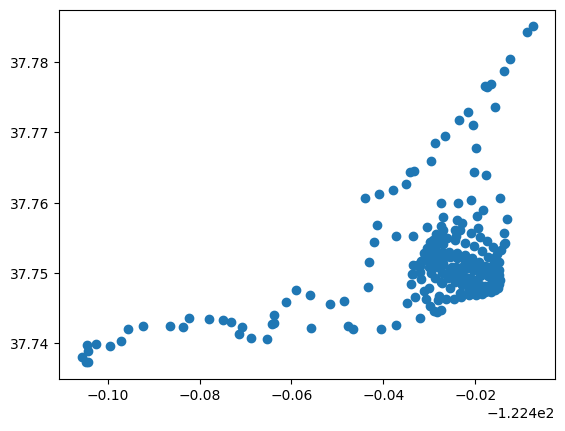

In [48]:
plt.scatter(df['Longitude'],df['Latitude'])